# Problema de flujo máximo.
### Autor: Saúl Sosa Díaz

En este cuaderno Jupyter, nos sumergiremos en el fascinante mundo del [Problema de Flujo Máximo a coste mínimo](https://es.wikipedia.org/wiki/Red_de_flujo), brindando una explicación detallada y presentando un modelo matemático para su resolución. Además, exploraremos la aplicación práctica de este problema, planteando un escenario hipotético que simula una situación que podríamos enfrentar en la vida cotidiana.

---
## El Problema.
El problema de flujo máximo a coste mínimo es una generalización del problema de flujo máximo. Por lo tanto, es fundamental que primero tengamos un entendimiento adecuado del problema de flujo máximo antes de abordar esta variante más compleja.

Según González Salazar, J.J. (2001, p. 297) en su libro 'Programación matemática' define el problema de flujo máximo como: 
_El problema del flujo máximo es el que aparece cuando tenemos una red de comunicaciones y deseamos enviar la mayor cantidad de producto desde un punto "fuente" a otro punto "sumidero" utilizando las conexiones de dicha red, pero sin exceder ciertos límites de tráfico que tienen tales conexiones._

Por ello, un flujo _s-t_ en un grafo $G = (V,A)$ se describe como una función $X$ de valores reales que asigna lo que llevará cada arco del grafo, un valor que cumple con las siguientes condiciones:

* **La conservación del flujo**: En el sistema, el flujo no se crea ni se destruye. Esto significa que todo lo que entra en un nodo que no sea _s_ (fuente) o _t_ (sumidero) debe ser igual a lo que sale de dicho nodo. Por otro lado, cuando el nodo es la fuente, la función asigna su propio valor al flujo, ya que está ingresando al sistema. De manera similar, cuando se trata del sumidero, que representa una salida del sistema, se le asigna un valor de flujo negativo.

$$
    \begin{array}{ccc}
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = Z & \text{si } i = s\\
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = -Z & \text{si } i = t\\
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = 0 &  \forall i \in V \setminus \{ s, t \} \  & \\
    \end{array}
$$

* **Restricciones de capacidad**: Lo que lleve cada arco no debe ser superior de la capacidad máxima que puede llevar.

$$
    \begin{array}{ccc}
    & 0\leq X_a \leq K_a & \forall a ∈ A
    \end{array}
$$

* **Un flujo _s-t_ es máximo si no existe otro flujo _s-t_ con mayor capacidad.**

El problema del s-t flujo máximo equivale al problema de determinar el flujo circulante $X$ con máximo valor de $X_{t,s}$. 
Para ello debemos añadir a $A$ el arco _(t,s)_ si no existe.
El flujo circulante nos lo dará una función que verifica las siguientes condiciones:

$$
    \begin{array}{ccc}
    & \sum_{ a∈δ⁺(i)} X_a - \sum_{ a∈δ⁻(i)} X_a = 0 & \forall i \in V \  & \\
    \end{array}
$$
$$
    \begin{array}{ccc}
    & 0\leq X_a \leq K_a & \forall a ∈ A
    \end{array}
$$


Teniendo claro el problema anterior, es facilmente abordable el problema de flujo máximo a costo mínimo.
En esta generalizacón lo que queremos es encontrar el _s-t_ flujo __máximo con menor costo total__.

La distinción principal radica en la inclusión de un nuevo conjunto de datos:
$C_a$ que indica el coste unitario del flujo de la arista $a$. $\forall a \in A$.

No obstante, en su esencia, el problema sigue siendo análogo al que discutimos previamente. Continuamos buscando encontrar un flujo circulante _s-t_ de costo total mínimo entre aquellos que transportan la máxima cantidad de flujo a través del arco _(t,s)_. 
Además, si le asignamos al coste de la arista $(t-s)$ un número $M$ para algún valor $M$ muy grande. el problema coincide con el problema de determinar el flujo circulante de mínimo costo.

## Supuesto.
Para abordar ejemplificar este problema vamos a vivir el siguiente supuesto.

Un día, ingresó a nuestras oficinas el Sr. Ayoze Hernández Díaz, quien ocupa la posición de coordinador y directivo en la empresa "Aguas de Tenerife". Su visita estaba motivada por una preocupante situación que enfrentaban en ese momento: la balsa principal de La Orotava se encontraba en un estado prácticamente vacío, lo cual generaba inquietud entre los agricultores locales, quienes, a causa de la escasez de agua, estaban expresando su descontento y exigiendo respuestas.

El Sr. Hernández Díaz nos informó que, en contraposición, la balsa de Santa Cruz de Tenerife disponía de un excedente considerable de agua, y la intención era trasladar la mayor cantidad posible de este recurso hacia la balsa de La Orotava. Sin embargo, se presentaba un desafío crucial: las tuberías que conectaban estas balsas tenían una capacidad máxima de transporte. Superar esta capacidad implicaría el riesgo de dañar las tuberías, lo que debía evitarse a toda costa.

Además, el Sr. Hernández Díaz nos explicó que, para llegar a la balsa de La Orotava desde Santa Cruz de Tenerife, era necesario atravesar una serie de balsas intermedias. Nos proporcionó un mapa detallado en el que se mostraban claramente estas balsas intermedias y las conexiones de tuberías entre ellas. Esta información era esencial para comprender la complejidad de la situación y evaluar las posibles soluciones.

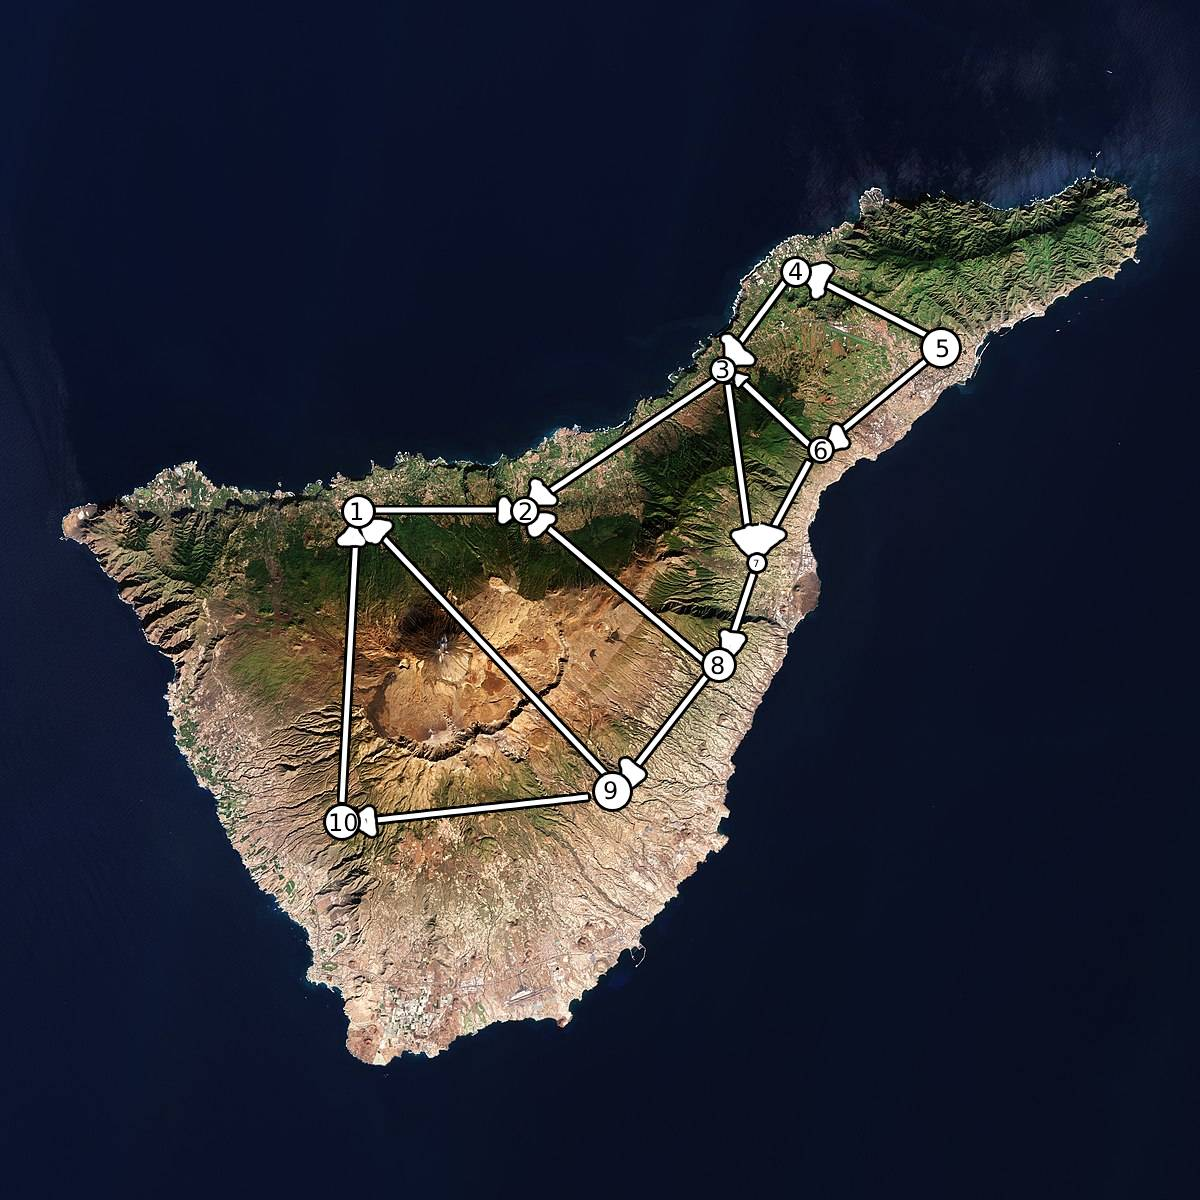

En el mapa se adjuntaba la siguiente leyenda:
| Balsa Origen | Balsa Destino | Caudal Máximo en l/m | Coste €/l |
|--------------|---------------|----------------------|-----------|
| 1            | 2             | 84                   |12
| 10           | 1             | 70                   |5
| 9            | 10            | 80                   |5
| 9            | 1             | 76                   |11
| 8            | 9             | 78                   |14
| 8            | 2             | 87                   |5
| 7            | 8             | 53                   |7
| 3            | 7             | 119                  |14
| 6            | 7             | 68                   |13
| 6            | 3             | 99                   |4
| 3            | 2             | 94                   |7
| 4            | 3             | 65                   |10
| 5            | 4             | 112                  |6
| 5            | 6             | 119                  |7


### Datos.
Tenemos un conjunto de nodos que corresponden a balsas, al conjunto lo llamaremos $V = \{1,\ldots,n\}$.

En este contexto, nuestro punto de origen, o nodo fuente, se identifica como la balsa de Santa Cruz, que corresponde al nodo 5 en nuestra representación. Por otro lado, el destino final, o nodo sumidero, se encuentra en la balsa de La Orotava, correspondiente al nodo 2 en nuestra estructura.



Cómo tenemos la información del mapa podemos crear una matriz $C_{ij}$. Donde cada posición indique la capacidad máxima de la tubería que conecta la balsa $_i$ con la balsa $_j$. $\forall i,j ∈ V$ .


### Modelo.
#### Variables.
* $Z$ = Flujo que entrará al sistema.
* $X_{ij}$ = Cuanto irá por la tubería que conecta la balsa $_i$ a la balsa $_j$.
#### Función Objetivo.
$$
\begin{array}{ccc}
max & Z 
\end{array}
$$
#### Restricciones.
$$
\begin{array}{ccc}
&  \sum_{j∈V} X_{sj} = Z & \\
&  \sum_{i∈V} X_{it} = Z & \\
&  \sum_{j∈V} X_{ij} - \sum_{j∈V} X_{ji} = 0 & i \in V \setminus \{ s, t \} \\\\
&  0\leq X_{ij} \leq C_{uj} & \forall i,j ∈ V \\
\end{array}
$$

La restricción tiene como objetivo expresar la idea fundamental de que la cantidad que sale de un nodo debe ser igual a la cantidad que llega a otro nodo. Por esta razón, los índices están modificados, excepto para los nodos _s_ y _t_.

## Resolución del problema.
Importamos los paquetes necesarios.

In [1]:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
Pkg.add("GraphRecipes")
Pkg.add("Plots")

using GraphRecipes, Plots, Graphs
using JuMP, GLPK, Random, Test, LinearAlgebra


  Installing known registries into `~/.julia`


    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


   Installed IrrationalConstants ── v0.2.2
   Installed MutableArithmetics ─── v1.3.3


   Installed DiffResults ────────── v1.1.0
   Installed SpecialFunctions ───── v2.3.1
   Installed JSON ───────────────── v0.21.4
   Installed DiffRules ──────────── v1.15.1
   Installed Preferences ────────── v1.4.1
   Installed Bzip2_jll ──────────── v1.0.8+0
   Installed BenchmarkTools ─────── v1.3.2


   Installed Parsers ────────────── v2.7.2
   Installed CodecBzip2 ─────────── v0.8.0


   Installed JLLWrappers ────────── v1.5.0
   Installed StaticArraysCore ───── v1.4.2
   Installed NaNMath ────────────── v1.0.2
   Installed OrderedCollections ─── v1.6.2
   Installed TranscodingStreams ─── v0.9.13
   Installed SnoopPrecompile ────── v1.0.3


   Installed PrecompileTools ────── v1.2.0


   Installed JuMP ───────────────── v1.15.1
   Installed ForwardDiff ────────── v0.10.36


   Installed CommonSubexpressions ─ v0.3.0
   Installed OpenSpecFun_jll ────── v0.5.5+0
   Installed Compat ─────────────── v4.10.0
   Installed MacroTools ─────────── v0.5.11
   Installed LogExpFunctions ────── v0.3.26
   Installed DataStructures ─────── v0.18.15
   Installed CodecZlib ──────────── v0.7.2


   Installed DocStringExtensions ── v0.9.3
   Installed MathOptInterface ───── v1.20.1


    Updating `~/.julia/environments/v1.9/Project.toml`
  [4076af6c] + JuMP v1.15.1
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
  [523fee87] + CodecBzip2 v0.8.0
  [944b1d66] + CodecZlib v0.7.2
  [bbf7d656] + CommonSubexpressions v0.3.0
  [34da2185] + Compat v4.10.0
  [864edb3b] + DataStructures v0.18.15
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [ffbed154] + DocStringExtensions v0.9.3
  [f6369f11] + ForwardDiff v0.10.36
  [92d709cd] + IrrationalConstants v0.2.2
  [692b3bcd] + JLLWrappers v1.5.0
  [682c06a0] + JSON v0.21.4
  [4076af6c] + JuMP v1.15.1
  [2ab3a3ac] + LogExpFunctions v0.3.26
  [1914dd2f] + MacroTools v0.5.11
  [b8f27783] + MathOptInterface v1.20.1
  [d8a4904e] + MutableArithmetics v1.3.3
  [77ba4419] + NaNMath v1.0.2
  [bac558e1] + OrderedCollections v1.6.2
  [69de0a69] + Parsers v2.7.2
  [aea7be01] + PrecompileTools v1.2.0
  [21216c6a] + Preferences v1.4.1
  [66db9d55] + SnoopPrecompile v1.0.3
  [27

Precompiling project...


  ✓ NaNMath


  ✓ OrderedCollections


  ✓ StaticArraysCore


  ✓ Compat
  ✓ CompilerSupportLibraries_jll


  ✓ DocStringExtensions


  ✓ Compat → CompatLinearAlgebraExt
  ✓ DiffResults


  ✓ Preferences
  ✓ TranscodingStreams


  ✓ IrrationalConstants


  ✓ SnoopPrecompile


  ✓ PrecompileTools


  ✓ JLLWrappers


  ✓ LogExpFunctions
  ✓ CodecZlib


  ✓ Bzip2_jll
  ✓ OpenSpecFun_jll


  ✓ CodecBzip2


  ✓ DataStructures


  ✓ MacroTools


  ✓ CommonSubexpressions


  ✓ SpecialFunctions


  ✓ DiffRules


  ✓ MutableArithmetics


  ✓ ForwardDiff


  ✓ Parsers


  ✓ JSON


  ✓ BenchmarkTools


  ✓ MathOptInterface


  ✓ JuMP
  31 dependencies successfully precompiled in 330 seconds. 6 already precompiled.
   Resolving package versions...


   Installed GLPK_jll ─ v5.0.1+0


   Installed GLPK ───── v1.1.3


    Updating `~/.julia/environments/v1.9/Project.toml`
  [60bf3e95] + GLPK v1.1.3
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [60bf3e95] + GLPK v1.1.3
  [e8aa6df9] + GLPK_jll v5.0.1+0
  [781609d7] + GMP_jll v6.2.1+2


Precompiling project...


  ✓ GLPK_jll


  ✓ GLPK
  2 dependencies successfully precompiled in 15 seconds. 38 already precompiled.
   Resolving package versions...


   Installed GPUArraysCore ─────────────── v0.1.5
   Installed IterTools ─────────────────── v1.8.0


   Installed OffsetArrays ──────────────── v1.12.10
   Installed ArnoldiMethod ─────────────── v0.2.0


   Installed ColorTypes ────────────────── v0.11.4
   Installed Adapt ─────────────────────── v3.6.2


   Installed TensorCore ────────────────── v0.1.1
   Installed TableTraits ───────────────── v1.0.1
   Installed Inflate ───────────────────── v0.1.4
   Installed GeometryTypes ─────────────── v0.8.5


   Installed GeometryBasics ────────────── v0.4.9
   Installed Tables ────────────────────── v1.11.0


   Installed NetworkLayout ─────────────── v0.4.6
   Installed DataAPI ───────────────────── v1.15.0
   Installed FixedPointNumbers ─────────── v0.8.4
   Installed Extents ───────────────────── v0.1.1


   Installed StaticArrays ──────────────── v1.6.5


   Installed RecipesBase ───────────────── v1.3.4
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed PlotUtils ─────────────────── v1.3.5
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed ColorVectorSpace ──────────── v0.10.0
   Installed ConstructionBase ──────────── v1.5.4
   Installed StructArrays ──────────────── v0.6.16


   Installed DataValueInterfaces ───────── v1.0.0


   Installed AbstractTrees ─────────────── v0.4.4
   Installed Reexport ──────────────────── v1.2.2
   Installed Ratios ────────────────────── v0.4.5
   Installed ChainRulesCore ────────────── v1.16.0
   Installed Graphs ────────────────────── v1.9.0


   Installed ColorSchemes ──────────────── v3.24.0
   Installed AxisAlgorithms ────────────── v1.0.1


   Installed Requires ──────────────────── v1.3.0
   Installed Colors ────────────────────── v0.12.10


   Installed WoodburyMatrices ──────────── v0.5.5
   Installed GraphRecipes ──────────────── v0.5.12
   Installed SimpleTraits ──────────────── v0.9.4
   Installed GeoInterface ──────────────── v1.3.2


   Installed Interpolations ────────────── v0.14.7


    Updating `~/.julia/environments/v1.9/Project.toml`
  [bd48cda9] + GraphRecipes v0.5.12
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.4
  [79e6a3ab] + Adapt v3.6.2
  [ec485272] + ArnoldiMethod v0.2.0
  [13072b0f] + AxisAlgorithms v1.0.1
  [d360d2e6] + ChainRulesCore v1.16.0
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.10
  [187b0558] + ConstructionBase v1.5.4
  [9a962f9c] + DataAPI v1.15.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [411431e0] + Extents v0.1.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [46192b85] + GPUArraysCore v0.1.5
  [cf35fbd7] + GeoInterface v1.3.2
  [5c1252a2] + GeometryBasics v0.4.9
  [4d00f742] + GeometryTypes v0.8.5
  [bd48cda9] + GraphRecipes v0.5.12
  [86223c79] + Graphs v1.9.0
  [d25df0c9] + Inflate v0.1.4
  [a98d9a8b] + Interpolations v0.14.7
  [c8e1da08] + IterTools v1.8.0
  [82899510] + IteratorInterfaceExtensions v1.

  ✓ DataValueInterfaces
  ✓ Reexport


  ✓ IteratorInterfaceExtensions


  ✓ Requires
  ✓ Inflate
  ✓ ConstructionBase


  ✓ DataAPI
  ✓ TensorCore


  ✓ AbstractTrees


  ✓ Extents
  ✓ WoodburyMatrices


  ✓ IterTools


  ✓ TableTraits


  ✓ SimpleTraits


  ✓ EarCut_jll
  ✓ Ratios


  ✓ Adapt


  ✓ AxisAlgorithms


  ✓ ChainRulesCore


  ✓ GeoInterface


  ✓ Tables


  ✓ RecipesBase


  ✓ OffsetArrays


  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt


  ✓ FixedPointNumbers


  ✓ Ratios → RatiosFixedPointNumbersExt


  ✓ ColorTypes


  ✓ SpecialFunctions


  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ DiffRules


  ✓ StaticArrays


  ✓ StaticArrays → StaticArraysStatisticsExt


  ✓ Adapt → AdaptStaticArraysExt


  ✓ ConstructionBase → ConstructionBaseStaticArraysExt


  ✓ ColorVectorSpace


  ✓ GPUArraysCore


  ✓ ColorVectorSpace → SpecialFunctionsExt


  ✓ ArnoldiMethod


  ✓ StructArrays


  ✓ GeometryTypes


  ✓ ForwardDiff


  ✓ Colors


  ✓ Interpolations


  ✓ ForwardDiff → ForwardDiffStaticArraysExt


  ✓ Graphs


  ✓ GeometryBasics


  ✓ ColorSchemes


  ✓ NetworkLayout


  ✓ NetworkLayout → NetworkLayoutGraphsExt


  ✓ PlotUtils


  ✓ GraphRecipes


  ✓ MathOptInterface


  ✓ GLPK


  ✓ JuMP
  54 dependencies successfully precompiled in 299 seconds. 34 already precompiled.
   Resolving package versions...


   Installed x265_jll ───────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────── v2.1.91+0


   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed GR_jll ─────────────────────── v0.72.10+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed RelocatableFolders ─────────── v1.0.1


   Installed Unitful ────────────────────── v1.17.0
   Installed Measures ───────────────────── v0.3.2


   Installed ConcurrentUtilities ────────── v2.2.1


   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Grisu ──────────────────────── v1.0.2
   Installed Formatting ─────────────────── v0.4.2


   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Contour ────────────────────── v0.6.2


   Installed RecipesPipeline ────────────── v0.6.12


   Installed Xorg_libpthread_stubs_jll ──── v0.1.1+0
   Installed OpenSSL ────────────────────── v1.4.1
   Installed DelimitedFiles ─────────────── v1.9.1


   Installed HTTP ───────────────────────── v1.10.0


   Installed Xorg_libSM_jll ─────────────── v1.2.3+0
   Installed Cairo_jll ──────────────────── v1.16.1+1
   Installed Xorg_xcb_util_jll ──────────── v0.4.0+1


   Installed Libgpg_error_jll ───────────── v1.42.0+0
   Installed Fontconfig_jll ─────────────── v2.13.93+0
   Installed Xorg_libxkbfile_jll ────────── v1.1.2+0


   Installed Xorg_libXinerama_jll ───────── v1.1.4+4
   Installed Xorg_libXau_jll ────────────── v1.0.11+0
   Installed EpollShim_jll ──────────────── v0.0.20230411+0
   Installed Missings ───────────────────── v1.1.0


   Installed Xorg_xcb_util_keysyms_jll ──── v0.4.0+1
   Installed FFMPEG ─────────────────────── v0.4.1
   Installed Showoff ────────────────────── v1.0.3
   Installed xkbcommon_jll ──────────────── v1.4.1+1
   Installed SimpleBufferStream ─────────── v1.1.0
   Installed XZ_jll ─────────────────────── v5.4.4+0
   Installed Pipe ───────────────────────── v1.3.0


   Installed LZO_jll ────────────────────── v2.10.1+0
   Installed HarfBuzz_jll ───────────────── v2.8.1+1
   Installed PlotThemes ─────────────────── v3.1.0


   Installed fzf_jll ────────────────────── v0.29.0+0
   Installed FriBidi_jll ────────────────── v1.0.10+0
   Installed UnicodeFun ─────────────────── v0.4.1
   Installed MbedTLS ────────────────────── v1.1.7
   Installed GLFW_jll ───────────────────── v3.3.8+0
   Installed x264_jll ───────────────────── v2021.5.5+0


   Installed FreeType2_jll ──────────────── v2.13.1+0
   Installed JLFzf ──────────────────────── v0.1.5
   Installed StatsAPI ───────────────────── v1.7.0
   Installed Xorg_libxcb_jll ────────────── v1.15.0+0
   Installed StatsBase ──────────────────── v0.34.2


   Installed mtdev_jll ──────────────────── v1.1.6+0
   Installed libaom_jll ─────────────────── v3.4.0+0
   Installed libpng_jll ─────────────────── v1.6.38+0
   Installed ExceptionUnwrapping ────────── v0.1.9


   Installed gperf_jll ──────────────────── v3.1.1+0
   Installed GR ─────────────────────────── v0.72.10
   Installed eudev_jll ──────────────────── v3.2.9+0
   Installed Xorg_libXext_jll ───────────── v1.3.4+4
   Installed Zstd_jll ───────────────────── v1.5.5+0
   Installed Xorg_xcb_util_cursor_jll ───── v0.1.4+0
   Installed Scratch ────────────────────── v1.2.0


   Installed Plots ──────────────────────── v1.39.0
   Installed Expat_jll ──────────────────── v2.5.0+0
   Installed Libffi_jll ─────────────────── v3.2.2+1
   Installed Libtiff_jll ────────────────── v4.5.1+1


   Installed Xorg_libXrender_jll ────────── v0.9.10+4
   Installed libevdev_jll ───────────────── v1.11.0+0
   Installed libinput_jll ───────────────── v1.18.0+0
   Installed Ogg_jll ────────────────────── v1.3.5+1
   Installed Vulkan_Loader_jll ──────────── v1.3.243+0
   Installed Xorg_libXi_jll ─────────────── v1.7.10+4
   Installed Xorg_libXcursor_jll ────────── v1.2.0+4
   Installed XSLT_jll ───────────────────── v1.1.34+0


   Installed Libuuid_jll ────────────────── v2.36.0+0
   Installed Wayland_protocols_jll ──────── v1.25.0+0
   Installed Xorg_xcb_util_renderutil_jll ─ v0.3.9+1
   Installed Xorg_libICE_jll ────────────── v1.0.10+1
   Installed Graphite2_jll ──────────────── v1.3.14+0
   Installed Pixman_jll ─────────────────── v0.42.2+0
   Installed libass_jll ─────────────────── v0.15.1+0


   Installed XML2_jll ───────────────────── v2.11.5+0
   Installed Latexify ───────────────────── v0.16.1
   Installed Gettext_jll ────────────────── v0.21.0+0
   Installed Xorg_xtrans_jll ────────────── v1.5.0+0
   Installed Wayland_jll ────────────────── v1.21.0+1
   Installed OpenSSL_jll ────────────────── v1.1.23+0
   Installed BitFlags ───────────────────── v0.1.7


   Installed FFMPEG_jll ─────────────────── v4.4.2+2
   Installed Libgcrypt_jll ──────────────── v1.8.7+0


   Installed Xorg_xkeyboard_config_jll ──── v2.39.0+0
   Installed Xorg_libXrandr_jll ─────────── v1.5.2+4
   Installed LLVMOpenMP_jll ─────────────── v15.0.4+0
   Installed LAME_jll ───────────────────── v3.100.1+0
   Installed Xorg_libXfixes_jll ─────────── v5.0.3+4
   Installed Libiconv_jll ───────────────── v1.17.0+0
   Installed Qt6Base_jll ────────────────── v6.5.2+2
   Installed URIs ───────────────────────── v1.5.0


   Installed Glib_jll ───────────────────── v2.76.5+0
   Installed LaTeXStrings ───────────────── v1.3.0
   Installed libvorbis_jll ──────────────── v1.3.7+1
   Installed Libglvnd_jll ───────────────── v1.6.0+0
   Installed Xorg_libXdmcp_jll ──────────── v1.1.4+0
   Installed Xorg_libX11_jll ────────────── v1.8.6+0
   Installed Unzip ──────────────────────── v0.2.0
   Installed UnitfulLatexify ────────────── v1.6.3


   Installed SortingAlgorithms ──────────── v1.1.1


    Updating `~/.julia/environments/v1.9/Project.toml`
  [91a5bcdd] + Plots v1.39.0
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [f0e56b4a] + ConcurrentUtilities v2.2.1
  [d38c429a] + Contour v0.6.2
  [8bb1440f] + DelimitedFiles v1.9.1
  [460bff9d] + ExceptionUnwrapping v0.1.9
  [c87230d0] + FFMPEG v0.4.1
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.72.10
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.10.0
  [1019f520] + JLFzf v0.1.5
  [b964fa9f] + LaTeXStrings v1.3.0
  [23fbe1c1] + Latexify v0.16.1
  [e6f89c97] + LoggingExtras v1.0.3
  [739be429] + MbedTLS v1.1.7
  [442fdcdd] + Measures v0.3.2
  [e1d29d7a] + Missings v1.1.0
  [4d8831e6] + OpenSSL v1.4.1
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.1.0
  [91a5bcdd] + Plots v1.39.0
  [01d81517] + RecipesPipeline v0.6.12
  [05181044] + RelocatableFolders v1.0.1
  [6c6a2e73] + Scratch v1.2.0
  [992d4aef] + Showoff v1.0.3
  [777ac1f9] + SimpleBufferStream v1.1.0
  [a2af116

Precompiling project...


  ✓ StatsAPI


  ✓ Pipe


  ✓ Contour


  ✓ Unzip
  ✓ LaTeXStrings


  ✓ Measures


  ✓ ConcurrentUtilities
  ✓ Grisu


  ✓ SimpleBufferStream


  ✓ URIs


  ✓ BitFlags


  ✓ Formatting
  ✓ ExceptionUnwrapping


  ✓ DelimitedFiles


  ✓ Xorg_libICE_jll


  ✓ Scratch


  ✓ LoggingExtras


  ✓ OpenSSL_jll


  ✓ Missings
  ✓ UnicodeFun


  ✓ Graphite2_jll


  ✓ Libmount_jll


  ✓ EpollShim_jll


  ✓ LLVMOpenMP_jll


  ✓ MbedTLS
  ✓ Xorg_libXau_jll


  ✓ libfdk_aac_jll


  ✓ LERC_jll


  ✓ libpng_jll
  ✓ LAME_jll


  ✓ fzf_jll


  ✓ JpegTurbo_jll


  ✓ Ogg_jll


  ✓ XZ_jll


  ✓ mtdev_jll


  ✓ gperf_jll


  ✓ Xorg_libXdmcp_jll
  ✓ x265_jll


  ✓ libaom_jll
  ✓ Zstd_jll


  ✓ x264_jll


  ✓ Expat_jll


  ✓ Opus_jll


  ✓ LZO_jll


  ✓ Xorg_xtrans_jll


  ✓ libevdev_jll


  ✓ Libiconv_jll


  ✓ Libffi_jll


  ✓ Wayland_protocols_jll


  ✓ Libgpg_error_jll


  ✓ Libuuid_jll


  ✓ Xorg_libpthread_stubs_jll


  ✓ FriBidi_jll


  ✓ SortingAlgorithms
  ✓ FreeType2_jll
  ✓ Showoff


  ✓ RelocatableFolders


  ✓ Pixman_jll


  ✓ JLFzf


  ✓ libvorbis_jll


  ✓ Xorg_libSM_jll


  ✓ eudev_jll


  ✓ Libtiff_jll


  ✓ XML2_jll


  ✓ Libgcrypt_jll


  ✓ libinput_jll


  ✓ Fontconfig_jll
  ✓ Gettext_jll


  ✓ Wayland_jll


  ✓ XSLT_jll


  ✓ Glib_jll


  ✓ OpenSSL


  ✓ Latexify


  ✓ PlotThemes
  ✓ Xorg_libxcb_jll


  ✓ StatsBase


  ✓ Xorg_libX11_jll


  ✓ Xorg_xcb_util_jll


  ✓ Xorg_libXfixes_jll


  ✓ Xorg_libXext_jll
  ✓ Xorg_libxkbfile_jll


  ✓ Xorg_xcb_util_image_jll


  ✓ Xorg_xcb_util_keysyms_jll


  ✓ Xorg_libXrender_jll


  ✓ Xorg_xcb_util_renderutil_jll


  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXi_jll


  ✓ Xorg_libXinerama_jll
  ✓ Libglvnd_jll
  ✓ Xorg_xkbcomp_jll


  ✓ Cairo_jll


  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXcursor_jll


  ✓ Xorg_xcb_util_cursor_jll


  ✓ Xorg_xkeyboard_config_jll


  ✓ RecipesPipeline


  ✓ HarfBuzz_jll


  ✓ GLFW_jll


  ✓ HTTP
  ✓ xkbcommon_jll


  ✓ libass_jll


  ✓ Vulkan_Loader_jll


  ✓ FFMPEG_jll


  ✓ Qt6Base_jll


  ✓ FFMPEG


  ✓ GR_jll


  ✓ GR


  ✓ Unitful


  ✓ Unitful → ConstructionBaseUnitfulExt


  ✓ UnitfulLatexify


  ✓ Plots


  ✓ Plots → UnitfulExt


  ✓ Plots → GeometryBasicsExt
  113 dependencies successfully precompiled in 253 seconds. 89 already precompiled.


ArgumentError: ArgumentError: Package Graphs not found in current path.
- Run `import Pkg; Pkg.add("Graphs")` to install the Graphs package.

### Introducimos los datos.

In [3]:
Cmax = [0 84 0 0 0 0 0 0 0 0;
     0 0 0 0 0 0 0 0 0 0;
     0 94 0 0 0 0 119 0 0 0;
     0 0 65 0 0 0 0 0 0 0;
     0 0 0 112 0 119 0 0 0 0;
     0 0 99 0 0 0 119 0 0 0;
     0 0 0 0 0 0 0 53 0 0;
     0 87 0 0 0 0 0 0 78 0;
     76 0 0 0 0 0 0 0 0 80;
     70 0 0 0 0 0 0 0 0 0
     ]
Costs = [0 12 0 0 0 0 0 0 0 0;
          0 0 0 0 0 0 0 0 0 0;
          0 7 0 0 0 0 14 0 0 0;
          0 0 10 0 0 0 0 0 0 0;
          0 0 0 6 0 7 0 0 0 0;
          0 0 4 0 0 0 13 0 0 0;
          0 0 0 0 0 0 0 7 0 0;
          0 5 0 0 0 0 0 0 14 0;
          11 0 0 0 0 0 0 0 0 5;
          5 0 0 0 0 0 0 0 0 0] 
s = 5
t = 2
n=size(Cmax,1)

10

Comprobamos que el grafo corresponde con el mapa de Tenerife.
Donde __los números entre paréntesis son las capacidades y los costes los del corchete.__

In [ ]:
function graph(C, Costs)
    edgelabel_dict = Dict()
    edgelabel_mat = Array{String}(undef, n, n)
    for i in 1:n
        for j in 1:n
            capacity = C[i, j]
            cost = Costs[i, j]
            edgelabel_mat[i, j] = edgelabel_dict[(i, j)] = string("($capacity)/[$cost]")
        end
    end
    edgelabel_vec = edgelabel_mat[:]
    graphplot(C, names=1:n, edgelabel=edgelabel_dict, node_dists=1000 ,curvature_scalar=0, nodeshape=:circle,  nodesize=0.2)
end

graph(Cmax, Costs)

Vemos que el grafo corresponde con el mapa proporcionado por el cliente.
Modificamos las capacidades y los costes para añadir la arista $t-s$ con una capacidad infinita y sumado con $M$.

In [2]:
M = 10000000000000
Costs[t,s] = M
Cmax[t,s] = M

UndefVarError: UndefVarError: `Costs` not defined

### Construir el modelo.
Si las capacidades $Cmax$ y los costes $Costs$ son números enteros, las variables resultantes resultarán también números enteros, la matriz es unimodular. Como explica González Salazar, J.J. (2001, p. 217). Programación Matemática.

In [ ]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0, Int)

# Definir función objetivo
@objective(model, Max, sum(Costs[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if Cmax[i, j] > 0
                        @constraint(model, x[i, j] <= Cmax[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end


@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)

Mostramos el modelo.

In [ ]:
print(model)

### Resolvemos el modelo.

In [ ]:
optimize!(model)

Mostramos el resultado

In [ ]:
objetive = objective_value(model) - value(x[t, s]) * M
println("Coste mínimo: ", objetive)

println("Flujo máximo: ", value(x[t, s]))

println("Flujos en los arcos:")
for i in 1:n
    println("  Nodo $i")
    for j in 1:n
        if value(x[i, j]) > 0
            println("    Flujo de $i->$j: ", value(x[i, j]), " coste ", Cost[i, j])
        end
    end
end

## Valores aleatorios. 
Ahora crearemos unos datos mucho más pequeño para comprobar que el problema está bien modelizado.

In [ ]:

n=10 # número de nodos
Random.seed!(555)   

C = zeros(n, n) # Matriz de capacidades de los arcos
Cost = zeros(n, n) # Matriz de costos de los arcos
for i in 1:n
    for j in i:n
        if i != j
            C[i, j] = rand(0:25)
            if Cmax[i, j] > 0
                Cost[i, j] = rand(1:15)
            end
        end
    end
end

s = 1 # Nodo fuente
t = n


println("s = ", s)
println("t = ", t)
graph(C)
#Cost[t,s] = 100000
C[t,s] = 1000000
Cost
graph(C)







In [ ]:
println(Cost)

In [ ]:
model = Model(GLPK.Optimizer)
set_silent(model)

# Definir variables
@variable(model, x[1:n,1:n] >= 0, Int)

# Definir función objetivo
@objective(model, Max, sum(Cost[i,j] * x[i,j] for i in 1:n, j in 1:n ))

# Definir restricciones
for i in 1:n
        for j in 1:n
                if C[i, j] > 0
                        @constraint(model, x[i, j] <= C[i, j])
                else
                        @constraint(model, x[i, j] == 0)
                end
        end
end


@constraint(model, c[i = 1:n],  sum(x[i, :])  - sum(x[:, i]) == 0)
print(model)


optimize!(model)

In [ ]:

objetive = objective_value(model)
println("Coste mínimo: ", objetive)
println()

println("Flujos en los arcos:")

for i in 1:n
    println("  Nodo $i")
    for j in 1:n
        if value(x[i, j]) > 0
            println("    Flujo de $i->$j: ", value(x[i, j]), " coste ", Cost[i, j])
        end
    end
end

Podemos comprobar con este pequeño ejemplo que el problema está correctamente modelizado.

## Comprobar que elige bien el camino minimo

In [ ]:
Cmax = 
    [0 4 0 4 0;
     0 0 4 0 4;
     0 0 0 0 8;
     0 0 4 0 4;
     0 0 0 0 0;
     ]
Costs =    
[0 1 0 1 0;
0 0 1 0 4;
0 0 0 0 1;
0 0 1 0 4;
0 0 0 0 0;
]
s = 5
t = 2
n=size(Cmax,1)

## Bibliografía:
* Salazar González,J.J. (2001). Programación matemática.